# Chapter 3: Linear Regression

### Advertising data set

In [2]:
# Import necessary packages
import numpy as np
from scipy import stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model, feature_selection
from IPython.display import display, HTML

In [3]:
# Read in Advertising data set
adv = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = "Unnamed: 0")

In [4]:
# Display head of data set
display(adv.head(5))

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# Correlations between predictors
names = [_ for _ in adv.columns]
corr = pd.DataFrame(np.corrcoef(adv.T), index = names, columns = names)
display(corr)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
# Initialize linear regression objects
fullModel = linear_model.LinearRegression()
reducedModel = linear_model.LinearRegression()

In [7]:
# Fit regression
fullModel.fit(adv[["TV", "Radio", "Newspaper"]], adv["Sales"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Print intercept, coefficients
advFullParams = np.insert(fullModel.coef_, 0, fullModel.intercept_)
print advFullParams

[  2.93888937e+00   4.57646455e-02   1.88530017e-01  -1.03749304e-03]


In [9]:
# Model fit statistics
tss = sum((adv["Sales"] - np.mean(adv["Sales"]))**2)
rss = sum((adv["Sales"] - fullModel.predict(adv[["TV", "Radio", "Newspaper"]]))**2)
rse = np.sqrt(rss / (adv.shape[0] - 1 - np.size(fullModel.coef_)))
f_stat = ((tss - rss) / np.size(fullModel.coef_)) / (rss / (adv.shape[0] - np.size(fullModel.coef_) - 1))
r2 = fullModel.score(adv[["TV", "Radio", "Newspaper"]], adv["Sales"])
r2adj = 1 - ((1-r2) * (adv.shape[0] - 1)) / (adv.shape[0] - np.size(fullModel.coef_) - 1)
print "Sum of square residuals, full model: %.5f" % rss
print "Residual standard error, full model: %.5f" % rse
print "F-statistic: %.5f" % f_stat
print "R^2: %.5f" % r2
print "Adjusted R^2: %.5f" % r2adj

Sum of square residuals, full model: 556.82526
Residual standard error, full model: 1.68551
F-statistic: 570.27070
R^2: 0.89721
Adjusted R^2: 0.89564


In [10]:
# Reduced model
reducedModel.fit(adv[["TV", "Radio"]], adv["Sales"])
rssReduced = sum((adv["Sales"] - reducedModel.predict(adv[["TV", "Radio"]]))**2)
f_statReduced = ((rssReduced - rss) / (np.size(fullModel.coef_) - np.size(reducedModel.coef_))) / (rss / (adv.shape[0] - np.size(fullModel.coef_) - 1))
r2Reduced = reducedModel.score(adv[["TV", "Radio"]], adv["Sales"])
r2adjReduced = 1 - ((1-r2Reduced) * (adv.shape[0] - 1)) / (adv.shape[0] - np.size(reducedModel.coef_) - 1)
print "Sum of square errors, reduced model: %.3f" % rssReduced
print "F-statistic, reduced model: %.3f" % f_statReduced
print "R^2: %.3f" % r2Reduced
print "Adjusted R^2: %.5f" % r2adjReduced

Sum of square errors, reduced model: 556.914
F-statistic, reduced model: 0.031
R^2: 0.897
Adjusted R^2: 0.89615


#### Since the F-statistic is very small, we can conclude that the full model does not fit the data significantly better than the reduced model. Furthermore, the slightly higher adjusted R^2 value for the reduced model suggests that it is a better model. 

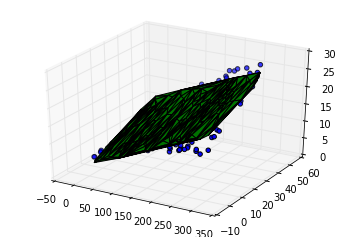

In [11]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter3D(adv["TV"], adv["Radio"], adv["Sales"])
ax.plot_trisurf(adv["TV"], adv["Radio"], reducedModel.predict(adv[["TV", "Radio"]]), color = "green")
plt.show()

In [12]:
adv["TV_by_Radio"] = adv["TV"] * adv["Radio"]
display(adv.head(5))

,TV,Radio,Newspaper,Sales,TV_by_Radio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [13]:
# Interaction model
interactModel = linear_model.LinearRegression()
interactModel.fit(adv[["TV", "Radio", "TV_by_Radio"]], adv["Sales"])
rssInteract = sum((adv["Sales"] - interactModel.predict(adv[["TV", "Radio", "TV_by_Radio"]]))**2)
varInteract = rssInteract / (adv.shape[0] - np.size(interactModel.coef_) - 1)
rseInteract = np.sqrt(rssInteract / (adv.shape[0] - 1 - np.size(interactModel.coef_)))
f_Interact = ((tss - rssInteract) / np.size(interactModel.coef_)) / (rssInteract / (adv.shape[0] - np.size(interactModel.coef_) - 1))
r2Interact = interactModel.score(adv[["TV", "Radio", "TV_by_Radio"]], adv["Sales"])
r2adjInteract = 1 - ((1-r2Interact) * (adv.shape[0] - 1)) / (adv.shape[0] - np.size(interactModel.coef_) - 1)
print "Sum of square errors, interaction model: %.3f" % rssInteract
print "Residual standard error, interaction model: %.3f" % rseInteract
print "F-statistic, interaction model: %.3f" % f_Interact
print "R^2, interaction model: %.3f" % r2Interact
print "Adjusted R^2, interaction model: %.3f" % r2adjInteract

Sum of square errors, interaction model: 174.483
Residual standard error, interaction model: 0.944
F-statistic, interaction model: 1963.057
R^2, interaction model: 0.968
Adjusted R^2, interaction model: 0.967


#### The model accounting for the interaction between TV and Radio spending best fits the data.
#### Now, let's look at some diagnostics for this model.

In [14]:
# Combine all parameters into one list for easy vectorization of later calculations
interactParams = np.insert(interactModel.coef_, 0, interactModel.intercept_)
print interactParams

[  6.75022020e+00   1.91010738e-02   2.88603399e-02   1.08649470e-03]


In [15]:
# Add column of 1's to more easily construct the design matrix
adv["Intercept"] = 1

# Design/predictor matrix
predMat = np.matrix(adv[["Intercept", "TV", "Radio", "TV_by_Radio"]])

# Covariance matrix
covInteract = varInteract * np.linalg.inv(predMat.T * predMat)

# Standard error of each predictor
stdErrors = np.sqrt(np.diag(covInteract))

# t-statistic of each predictor
tTests = interactParams / stdErrors

# p-value of each predictor
pVals = stats.t.sf(np.abs(tTests), adv.shape[0] - 1) * 2

print "Intercept and Regression Coefficients: ", interactParams
print "Standard Errors of Estimates: ", stdErrors
print "T-Statistics of Estimates: ", tTests
print "P-values: ", pVals

Intercept and Regression Coefficients:  [  6.75022020e+00   1.91010738e-02   2.88603399e-02   1.08649470e-03]
Standard Errors of Estimates:  [  2.47871370e-01   1.50414551e-03   8.90527286e-03   5.24203958e-05]
T-Statistics of Estimates:  [ 27.23275465  12.69895347   3.24081478  20.72656418]
P-values:  [  4.83102378e-69   1.88824182e-27   1.39717054e-03   1.35492577e-51]


#### All 3 predictors and the intercept are significant.

In [16]:
# Hat matrix
hatMatrix = predMat * np.linalg.inv(predMat.T * predMat) * predMat.T

# Add columns different diagnostics 
adv["Predicted Values"] = interactModel.predict(adv[["TV", "Radio", "TV_by_Radio"]])
adv["Raw Residuals"] = adv["Sales"] - adv["Predicted Values"]
adv["Leverage"] = np.diag(hatMatrix)
adv["Studentized Residuals"] = adv["Raw Residuals"] / (np.sqrt(varInteract * (1 - adv["Leverage"])))
display(adv.head(5))

,TV,Radio,Newspaper,Sales,TV_by_Radio,Intercept,Predicted Values,Raw Residuals,Leverage,Studentized Residuals
1,230.1,37.8,69.2,22.1,8697.78,1,21.686390,0.413610,0.017370,0.442229
2,44.5,39.3,45.1,10.4,1748.85,1,10.634546,-0.234546,0.026436,-0.251939
3,17.2,45.9,69.3,9.3,789.48,1,9.261214,0.038786,0.054256,0.042271
4,151.5,41.3,58.5,18.5,6256.95,1,17.634108,0.865892,0.012418,0.923481
5,180.8,10.8,58.4,12.9,1952.64,1,12.636919,0.263081,0.010415,0.280294


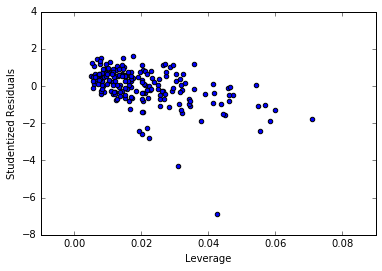

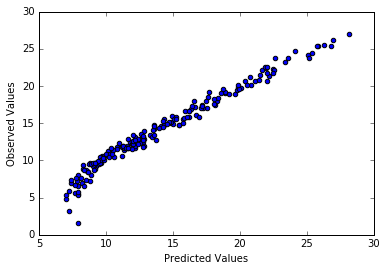

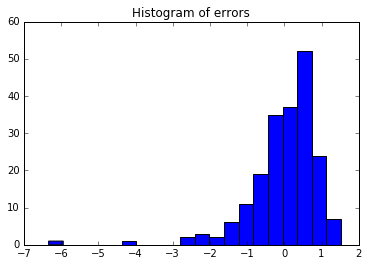

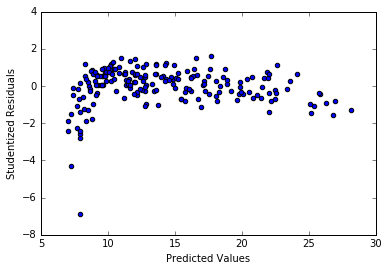

In [17]:
# Investigate diagnostics

# Plot of leverage vs. studentized residuals to look for significant outliers
plt.scatter(adv["Leverage"], adv["Studentized Residuals"])
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.show()

# Plot of predicted vs. observed values to determine fit, linearity
plt.scatter(adv["Predicted Values"], adv["Sales"])
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.show()

# Histogram of residuals (to test normality of errors)
plt.hist(adv["Raw Residuals"], bins = 20)
plt.title("Histogram of errors")
plt.show()

# Plot of fitted values vs. residuals (to test for homoscedasticity)
plt.scatter(adv["Predicted Values"], adv["Studentized Residuals"])
plt.xlabel("Predicted Values")
plt.ylabel("Studentized Residuals")
plt.show()

# Chapter Exercises

## 8) Simple linear regression

In [18]:
# Read in auto data
auto = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace = True,
                     header = None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name'],
                     na_values = "?")
display(auto.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [19]:
# a) Simple regression - horsepower

# Remove missing values from data set
auto = auto.ix[~np.isnan(auto["horsepower"])]

# Initiate and fit linear regression object
autoSimple = linear_model.LinearRegression()
autoSimple.fit(auto["horsepower"].reshape(-1, 1), auto["mpg"])

# Concatenate and print parameters
autoParams = np.insert(autoSimple.coef_, 0, autoSimple.intercept_)
print autoParams

[ 39.93586102  -0.15784473]


In [20]:
# Model fit statistics
tssAuto = sum((auto["mpg"] - np.mean(auto["mpg"]))**2)
rssAuto = sum((auto["mpg"] - autoSimple.predict(auto["horsepower"].reshape(-1, 1)))**2)
rseAuto = np.sqrt(rssAuto / (auto.shape[0] - 1 - np.size(autoSimple.coef_)))
fAuto = ((tssAuto - rssAuto) / np.size(autoSimple.coef_)) / (rssAuto / (auto.shape[0] - np.size(autoSimple.coef_) - 1))
r2Auto = autoSimple.score(auto["horsepower"].reshape(-1, 1), auto["mpg"])
print "Sum of square errors, full model: %.3f" % rssAuto
print "Residual standard error, full model: %.3f" % rseAuto
print "F-statistic: %.3f" % fAuto
print "R^2: %.3f" % r2Auto

Sum of square errors, full model: 9385.916
Residual standard error, full model: 4.906
F-statistic: 599.718
R^2: 0.606


In [21]:
# Summary of predictors

# Create column of 1's to build design matrix
auto.loc[:,"Intercept"] = 1

# Design matrix
predMat = np.matrix(auto[["Intercept", "horsepower"]])

# Error variance
varAuto = rssAuto / (auto.shape[0] - np.size(autoSimple.coef_) - 1)

# Covariance
covAuto = varAuto * np.linalg.inv(predMat.T * predMat)

# Standard errors
stdErrors = np.sqrt(np.diag(covAuto))

# t-statistics
tTests = autoParams / stdErrors

# p-values
pVals = stats.t.sf(np.abs(tTests), auto.shape[0] - 1) * 2 

# Print summary of predictors
print "Intercept and Regression Coefficients: ", autoParams
print "Standard Errors of Estimates: ", stdErrors
print "T-Statistics of Estimates: ", tTests
print "P-values: ", pVals

Intercept and Regression Coefficients:  [ 39.93586102  -0.15784473]
Standard Errors of Estimates:  [ 0.71749866  0.0064455 ]
T-Statistics of Estimates:  [ 55.65984091 -24.48913516]
P-values:  [  6.35807240e-188   5.97311375e-081]


In [22]:
# Fit diagnostics

# Hat matrix
hatMatrix = predMat * np.linalg.inv(predMat.T * predMat) * predMat.T

# Add fit diagnostics
auto.loc[:,"Predicted Values"] = autoSimple.predict(auto["horsepower"].reshape(-1, 1))
auto.loc[:,"Raw Residuals"] = auto.loc[:,"mpg"] - auto.loc[:,"Predicted Values"]
auto.loc[:, "Squared Residuals"] = auto.loc[:,"Raw Residuals"] ** 2
auto.loc[:,"Leverage"] = np.diag(hatMatrix)
auto.loc[:,"Studentized Residuals"] = auto.loc[:,"Raw Residuals"] / (varAuto * np.sqrt(1 - auto.loc[:,"Leverage"]))
display(auto.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Intercept,Predicted Values,Raw Residuals,Squared Residuals,Leverage,Studentized Residuals
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,19.416046,-1.416046,2.005185,0.003676,-0.058947
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,13.891480,1.108520,1.228817,0.008876,0.046267
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,16.259151,1.740849,3.030555,0.006130,0.072558
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,16.259151,-0.259151,0.067159,0.006130,-0.010801
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,17.837598,-0.837598,0.701571,0.004730,-0.034886


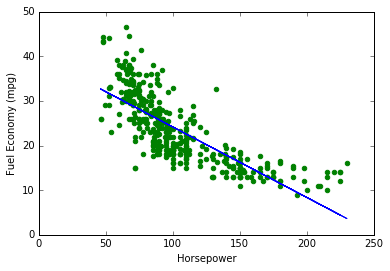

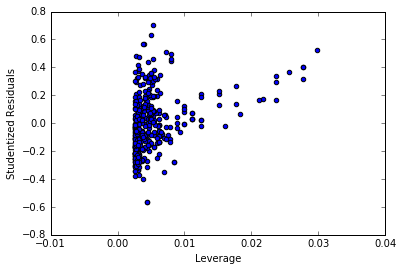

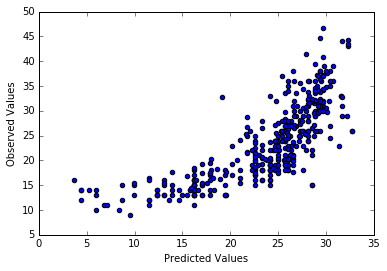

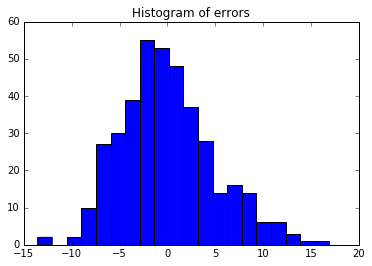

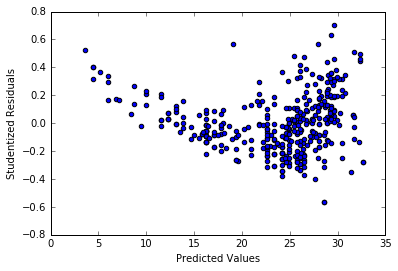

In [23]:
# Investigate diagnostics

# Scatter plot of original data with regression line
plt.scatter(auto["horsepower"], auto["mpg"], color = "green")
plt.plot(auto["horsepower"], auto["Predicted Values"], color = "blue")
plt.xlabel("Horsepower")
plt.ylabel("Fuel Economy (mpg)")
plt.show()

# Plot of leverage vs. studentized residuals to look for significant outliers
plt.scatter(auto["Leverage"], auto["Studentized Residuals"])
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.show()

# Plot of fitted vs. observed values to determine fit, linearity
plt.scatter(auto["Predicted Values"], auto["mpg"])
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.show()

# Histogram of residuals (to test normality of errors)
plt.hist(auto["Raw Residuals"], bins = 20)
plt.title("Histogram of errors")
plt.show()

# Plot of fitted values vs. residuals (to test for homoscedasticity)
plt.scatter(auto["Predicted Values"], auto["Studentized Residuals"])
plt.xlabel("Predicted Values")
plt.ylabel("Studentized Residuals")
plt.show()

#### There is a strong relationship between horsepower and mpg. This is evidenced by the large F-statistic (599.718) and R^2 value (0.606) for the model, suggesting that over 60% of the variance in mpg can be attributed to horsepower. The coefficient of “horsepower” in the model has a p-value less than 0.05. The relationship is negative (as horsepower increases, mpg decreases), and a horsepower of 98 would predict an mpg of 39.936 - 0.158(98) = 24.452.
#### However, this might not be the best form of the model. The "kinks" in the first two scatter plots suggest that the relationship between  horsepower and mpg may not be strictly linear. There do not appear to be highly influential outliers. The residuals are, for the most part, normally distributed. The final plot shows a high level of heteroscedasticity in the residuals which will bias the standard errors and may lead to incorrect conclusions about the significance of the parameter estimates. 

# 9) Multiple regression

In [24]:
# Correlation matrix

names = [_ for _ in auto.ix[:, 0:8].columns]
corr = pd.DataFrame(np.corrcoef(auto.ix[:, 0:8].T), index = names, columns = names)
display(corr)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [25]:
# Initiate and fit full multiple regression model
autoMultReg = linear_model.LinearRegression()
autoMultReg.fit(auto.ix[:, 1:8], auto.ix[:, "mpg"])
autoParams = np.insert(autoMultReg.coef_, 0, autoMultReg.intercept_)
print autoParams

[ -1.72184346e+01  -4.93376319e-01   1.98956437e-02  -1.69511442e-02
  -6.47404340e-03   8.05758383e-02   7.50772678e-01   1.42614050e+00]


In [26]:
# Model fit statistics

rssAuto = sum((auto.ix[:, "mpg"] - autoMultReg.predict(auto.ix[:, 1:8]))**2)
rseAuto = np.sqrt(rssAuto / (auto.shape[0] - 1 - np.size(autoMultReg.coef_)))
fAuto = ((tssAuto - rssAuto) / np.size(autoMultReg.coef_)) / (rssAuto / (auto.shape[0] - np.size(autoMultReg.coef_) - 1))
r2Auto = autoMultReg.score(auto.ix[:, 1:8], auto.ix[:, "mpg"])
print "Sum of square errors, full model: %.3f" % rssAuto
print "Residual standard error, full model: %.3f" % rseAuto
print "F-statistic: %.3f" % fAuto
print "R^2: %.3f" % r2Auto

Sum of square errors, full model: 4252.213
Residual standard error, full model: 3.328
F-statistic: 252.428
R^2: 0.821


In [27]:
# Creating diagnostic stats
auto.loc[:,"Intercept"] = 1
predMat = np.matrix(auto.ix[:, ["Intercept", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]])
varAuto = rssAuto / (auto.shape[0] - np.size(autoMultReg.coef_) - 1)
covAuto = varAuto * np.linalg.inv(predMat.T * predMat)
stdErrors = np.sqrt(np.diag(covAuto))
tTests = autoParams / stdErrors
pVals = stats.t.sf(np.abs(tTests), auto.shape[0] - 1) * 2 
print "Intercept and Regression Coefficients: ", autoParams
print "Standard Errors of Estimates: ", stdErrors
print "T-Statistics of Estimates: ", tTests
print "P-values: ", pVals

Intercept and Regression Coefficients:  [ -1.72184346e+01  -4.93376319e-01   1.98956437e-02  -1.69511442e-02
  -6.47404340e-03   8.05758383e-02   7.50772678e-01   1.42614050e+00]
Standard Errors of Estimates:  [  4.64429415e+00   3.23282315e-01   7.51507916e-03   1.37868914e-02
   6.52047761e-04   9.88449567e-02   5.09731223e-02   2.78136092e-01]
T-Statistics of Estimates:  [ -3.70743843  -1.52614695   2.6474297   -1.22951169  -9.92878711
   0.815174    14.72879519   5.12749166]
P-values:  [  2.39607376e-04   1.27781737e-01   8.43861857e-03   2.19619355e-01
   7.23102272e-21   4.15468977e-01   2.25690965e-39   4.62876104e-07]


#### Notice that "acceleration" has the largest p-value. It will be the first feature removed when tuning the model. 

In [28]:
hatMatrix = predMat * np.linalg.inv(predMat.T * predMat) * predMat.T
auto.loc[:,"Predicted Values"] = autoMultReg.predict(auto.ix[:, 1:8])
auto.loc[:,"Raw Residuals"] = auto.loc[:,"mpg"] - auto.loc[:,"Predicted Values"]
auto.loc[:, "Squared Residuals"] = auto.loc[:,"Raw Residuals"] ** 2
auto.loc[:,"Leverage"] = np.diag(hatMatrix)
auto.loc[:,"Studentized Residuals"] = auto.loc[:,"Raw Residuals"] / (np.sqrt(varAuto * (1 - auto.loc[:,"Leverage"])))
display(auto.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Intercept,Predicted Values,Raw Residuals,Squared Residuals,Leverage,Studentized Residuals
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,15.000959,2.999041,8.994249,0.023231,0.911895
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,13.999299,1.000701,1.001402,0.018117,0.303482
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,15.240447,2.759553,7.615133,0.021558,0.838358
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,15.061906,0.938094,0.880021,0.022267,0.285098
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,14.967178,2.032822,4.132367,0.025870,0.618941


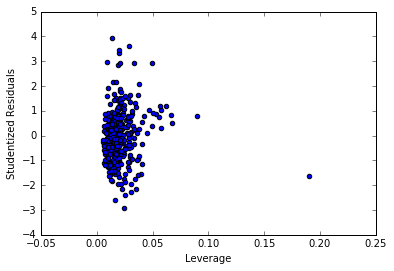

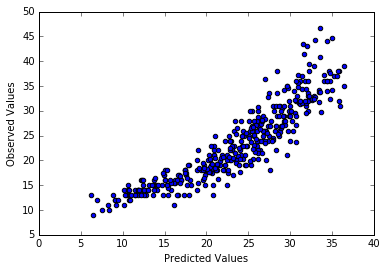

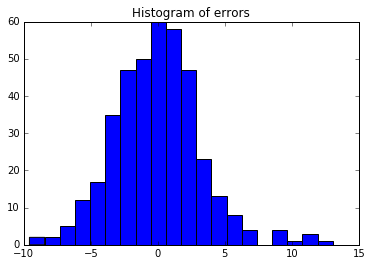

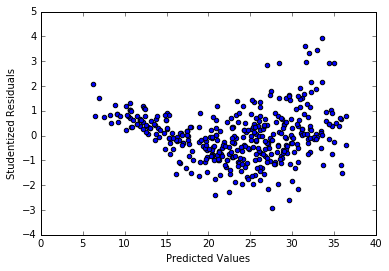

In [29]:
# Investigate diagnostics

# Scatter plot of original data with regression line
# plt.scatter(auto["horsepower"], auto["mpg"], color = "green")
# plt.plot(auto["horsepower"], auto["Fitted Values"], color = "blue")
# plt.xlabel("Horsepower")
# plt.ylabel("Fuel Economy (mpg)")
# plt.show()

# Plot of leverage vs. studentized residuals to look for significant outliers
plt.scatter(auto["Leverage"], auto["Studentized Residuals"])
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.show()

# Plot of fitted vs. observed values to determine fit, linearity
plt.scatter(auto["Predicted Values"], auto["mpg"])
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.show()

# Histogram of residuals (to test normality of errors)
plt.hist(auto["Raw Residuals"], bins = 20)
plt.title("Histogram of errors")
plt.show()

# Plot of fitted values vs. residuals (to test for homoscedasticity)
plt.scatter(auto["Predicted Values"], auto["Studentized Residuals"])
plt.xlabel("Predicted Values")
plt.ylabel("Studentized Residuals")
plt.show()

#### The full multiple regression model is better at predicting mpg than the simple regression model with only "horsepower." However, the diagnostic plots still show a departure from true linearity and the presence of heteroscedasticity in the residuals.

#### In order to better fit these assumptions, we are going to apply a square root transformation to the dependent variable and remove "acceleration" as a predictor. 

In [30]:
# Create "sqrtMpg" column
auto.loc[:, "sqrtMpg"] = np.sqrt(auto["mpg"])

In [31]:
# Fit model
sqrtMpg = linear_model.LinearRegression()
sqrtMpg.fit(auto.ix[:, [1, 2, 3, 4, 6, 7]], auto.ix[:,"sqrtMpg"])
sqrtParams = np.insert(sqrtMpg.coef_, 0, sqrtMpg.intercept_)
print sqrtParams

[  1.13154999e+00  -5.98687213e-02   1.73098593e-03  -2.74782240e-03
  -6.27990435e-04   7.37010713e-02   1.21733160e-01]


In [32]:
tssAuto = sum((auto["sqrtMpg"] - np.mean(auto["sqrtMpg"]))**2)
rssAuto = sum((auto.ix[:, "sqrtMpg"] - sqrtMpg.predict(auto.ix[:, [1, 2, 3, 4, 6, 7]])) ** 2)
rseAuto = np.sqrt(rssAuto / (auto.shape[0] - 1 - np.size(sqrtMpg.coef_)))
fAuto = ((tssAuto - rssAuto) / np.size(sqrtMpg.coef_)) / (rssAuto / (auto.shape[0] - np.size(sqrtMpg.coef_) - 1))
r2Auto = sqrtMpg.score(auto.ix[:, [1, 2, 3, 4, 6, 7]], auto.ix[:, "sqrtMpg"])
print "Sum of square errors, reduced model: %.3f" % rssAuto
print "Residual standard error, reduced model: %.3f" % rseAuto
print "F-statistic: %.3f" % fAuto
print "R^2: %.3f" % r2Auto

Sum of square errors, reduced model: 36.297
Residual standard error, reduced model: 0.307
F-statistic: 381.611
R^2: 0.856


In [33]:
# Summary of parameter estimates
auto.loc[:,"Intercept"] = 1
predMat = np.matrix(auto.ix[:, ["Intercept", "cylinders", "displacement", "horsepower", "weight", "year", "origin"]])
varAuto = rssAuto / (auto.shape[0] - np.size(sqrtMpg.coef_) - 1)
covAuto = varAuto * np.linalg.inv(predMat.T * predMat)
stdErrors = np.sqrt(np.diag(covAuto))
tTests = sqrtParams / stdErrors
pVals = stats.t.sf(np.abs(tTests), auto.shape[0] - 1) * 2 
print "Intercept and Regression Coefficients: ", autoParams
print "Standard Errors of Estimates: ", stdErrors
print "T-Statistics of Estimates: ", tTests
print "P-values: ", pVals

Intercept and Regression Coefficients:  [ -1.72184346e+01  -4.93376319e-01   1.98956437e-02  -1.69511442e-02
  -6.47404340e-03   8.05758383e-02   7.50772678e-01   1.42614050e+00]
Standard Errors of Estimates:  [  3.85419592e-01   2.97913328e-02   6.89785550e-04   1.00026067e-03
   5.27435909e-05   4.68884313e-03   2.56626327e-02]
T-Statistics of Estimates:  [  2.93589121  -2.00960198   2.50945519  -2.74710631 -11.90647856
  15.71839134   4.74359594]
P-values:  [  3.52240888e-03   4.51599467e-02   1.24951610e-02   6.29047098e-03
   4.19772098e-28   1.69416309e-43   2.94783824e-06]


#### All predictors in the model are now significant at the 0.05 level.

In [34]:
hatMatrix = predMat * np.linalg.inv(predMat.T * predMat) * predMat.T
auto.loc[:,"Predicted Values"] = sqrtMpg.predict(auto.ix[:, [1, 2, 3, 4, 6, 7]])
auto.loc[:,"Raw Residuals"] = auto.loc[:,"sqrtMpg"] - auto.loc[:,"Predicted Values"]
auto.loc[:, "Squared Residuals"] = auto.loc[:,"Raw Residuals"] ** 2
auto.loc[:,"Leverage"] = np.diag(hatMatrix)
auto.loc[:,"Studentized Residuals"] = auto.loc[:,"Raw Residuals"] / (np.sqrt(varAuto * (1 - auto.loc[:,"Leverage"])))
display(auto.head(5))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Intercept,Predicted Values,Raw Residuals,Squared Residuals,Leverage,Studentized Residuals,sqrtMpg
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,3.907126,0.335515,0.112570,0.019891,1.103749,4.242641
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,3.766694,0.106289,0.011297,0.018035,0.349331,3.872983
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,3.913913,0.328727,0.108062,0.020810,1.081927,4.242641
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,3.891564,0.108436,0.011758,0.022267,0.357158,4.000000
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,3.905532,0.217574,0.047338,0.020581,0.716008,4.123106


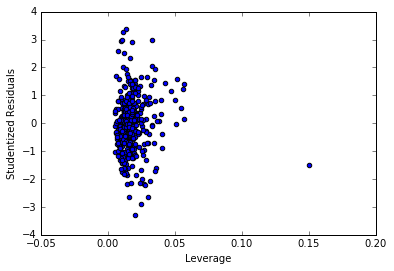

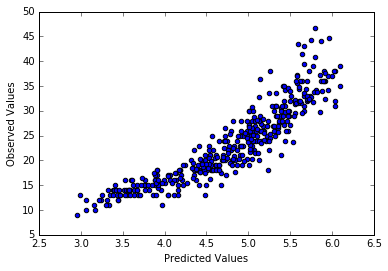

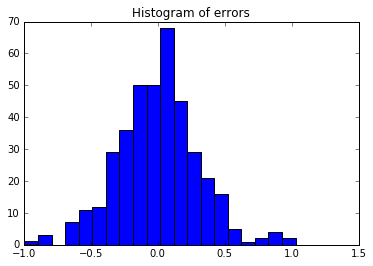

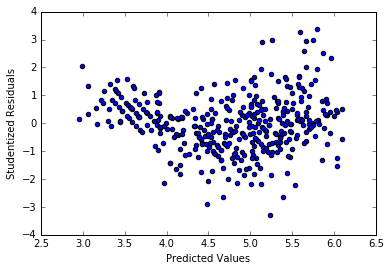

In [35]:
# Investigate diagnostics

# Scatter plot of original data with regression line
# plt.scatter(auto["horsepower"], auto["mpg"], color = "green")
# plt.plot(auto["horsepower"], auto["Fitted Values"], color = "blue")
# plt.xlabel("Horsepower")
# plt.ylabel("Fuel Economy (mpg)")
# plt.show()

# Plot of leverage vs. studentized residuals to look for significant outliers
plt.scatter(auto["Leverage"], auto["Studentized Residuals"])
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.show()

# Plot of fitted vs. observed values to determine fit, linearity
plt.scatter(auto["Predicted Values"], auto["mpg"])
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.show()

# Histogram of residuals (to test normality of errors)
plt.hist(auto["Raw Residuals"], bins = 20)
plt.title("Histogram of errors")
plt.show()

# Plot of fitted values vs. residuals (to test for homoscedasticity)
plt.scatter(auto["Predicted Values"], auto["Studentized Residuals"])
plt.xlabel("Predicted Values")
plt.ylabel("Studentized Residuals")
plt.show()

#### This model appears more linear and has less heteroscedasticity than the full, untransformed model.

#### Though it is outside the scope of this chapter, the correlation matrix suggests that there might be collinearity between these predictors which, in turn, confounds the interpretation of parameter estimates. This could be alleviated by principal component analysis or factor analysis, a topic discussed later in the book. 